In [1]:
%cd ../../
import pandas as pd
import os
import json
from orderbookrl.evaluate.hp_utils import get_data, get_dataframe
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/media/olle/DATA/Projects/orderbookrl


In [7]:
logs_dir = 'logs/marketorderenv/hp_ppo/ppo-cumpret-hp/'
cols = ['episode_reward_max', 'episode_reward_min',  'episode_reward_mean',
       'timesteps_this_iter']
data_dict = get_data(logs_dir, cols)

hpcols = set(['gamma', 'lr', 'sgd_minibatch_size', 'clip_param'])
temp = get_dataframe(data_dict, hpcols)

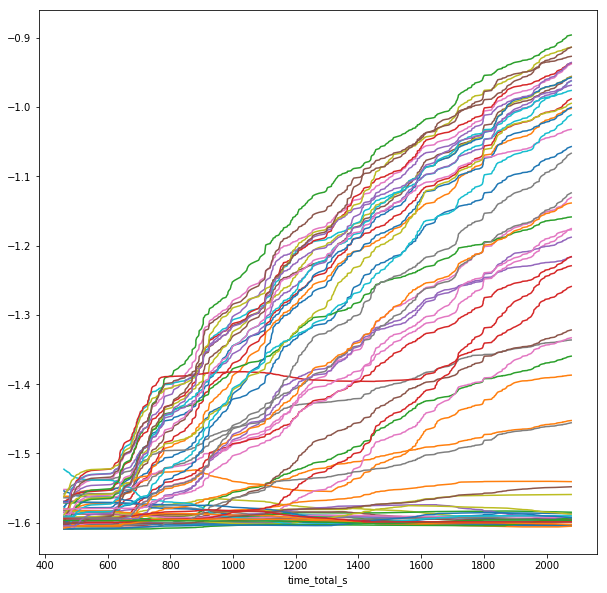

In [8]:
temp = temp.ffill().bfill()
temp.rolling(100).mean().dropna().plot(figsize=(10,10), legend=False); # .legend(bbox_to_anchor=(1.1, 1));

In [9]:
x = temp[1900:].mean()
x.sort_values(ascending=False).head(n=30).to_frame()

0
clip_param gamma  lr   sgd_minibatch_size          
0.3        0.99   0.1  10240              -0.872480
                  0.01 10240              -0.875407
                  1    10240              -0.884623
0.1        0.9999 0.01 10240              -0.888254
0.3        0.99   1    20480              -0.900873
                  0.1  20480              -0.905124
                  1    10240              -0.906766
0.1        0.99   0.1  10240              -0.916204
                  1    10240              -0.919966
0.3        0.9999 0.01 20480              -0.923029
0.1        0.99   0.1  20480              -0.925435
0.3        0.9999 0.01 10240              -0.928130
0.1        0.99   1    10240              -0.940559
                  0.01 10240              -0.946025
                  0.1  10240              -0.962515
           0.9999 0.1  10240              -0.964282
                  1    20480              -0.966160
0.3        0.9999 0.1  20480              -0.968554
0.1        0.9999 0.1  20480              -0.975683
           0.99   1    20480              -1.000304
           0.9999 1    10240              -1.017501
0.3        0.9999 0.1  10240              -1.034765
0.1        0.99   0.01 10240              -1.096647
0.3        0.9999 1    10240              -1.109741
                       20480              -1.110157
0.1        0.99   1    20480              -1.139972
0.3        0.9999 0.01 10240              -1.147747
0.1        0.9999 0.1  10240              -1.150844
0.3        0.9999 1    20480              -1.165038
           0.99   1    10240              -1.184172

In [10]:
x.sort_values(ascending=False).tail(n=30).to_frame()

0
clip_param gamma  lr   sgd_minibatch_size          
0.3        0.99   0.01 10240              -1.442744
                  1    20480              -1.447548
           0.9999 1    10240              -1.541825
0.1        0.9999 0.01 10240              -1.544785
0.3        0.99   0.01 10240              -1.558450
0.1        0.99   1    10240              -1.580752
                       10240              -1.586764
           0.9999 1    10240              -1.588150
0.3        0.9999 0.1  10240              -1.590323
           0.99   0.1  20480              -1.591711
                       10240              -1.593051
0.1        0.9999 0.01 20480              -1.593957
                  0.1  10240              -1.594042
                  1    10240              -1.596206
           0.99   0.1  20480              -1.596374
0.3        0.99   1    10240              -1.597080
0.1        0.9999 0.1  10240              -1.597098
                  1    10240              -1.597338
0.3        0.9999 0.01 10240              -1.597389
0.1        0.9999 0.01 20480              -1.597635
0.3        0.9999 0.01 20480              -1.598884
0.1        0.9999 0.1  20480              -1.599387
           0.99   0.01 10240              -1.600012
0.3        0.9999 0.1  10240              -1.602603
0.1        0.9999 0.01 10240              -1.602874
           0.99   0.1  10240              -1.603422
0.3        0.9999 0.1  20480              -1.603636
                  0.01 10240              -1.605009
0.1        0.99   0.1  10240              -1.605228
0.3        0.99   0.1  10240              -1.606063

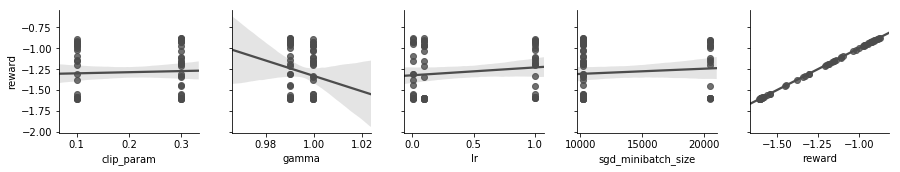

In [11]:
data = x.to_frame(name='reward').reset_index().astype(float)
data = data.rename(columns={'lambda':'lamb'})
cols = [str(c) for c in data.columns]

g = sns.PairGrid(data, x_vars=cols, y_vars='reward')
g.map(sns.regplot, color=".3");

In [12]:
' + '.join(cols)

'clip_param + gamma + lr + sgd_minibatch_size + reward'

In [13]:
data_mean = data.subtract(data.mean()) / data.std()
model = ols(formula='reward ~ ' + '  + '.join(cols),
             data=data_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 reward   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.863e+31
Date:                Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:10:36   Log-Likelihood:                 2299.1
No. Observations:                  68   AIC:                            -4586.
Df Residuals:                      62   BIC:                            -4573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.939e-18   6.37e-17      0.109      0.914    -1.2e-16    1.34e-16
clip_param         -4.337e-18   6.42e-17     -0.068      0.946   -1.33e-16    1.24e-16
gamma              -3.539e-16   6.54e-17     -5.413      0.000   -4.85e-16   -2.23e-16
lr                 -2.186e-16    6.5e-17     -3.363      0.001   -3.48e-16   -8.87e-17
sgd_minibatch_size    3.4e-16    6.5e-17      5.233      0.000     2.1e-16     4.7e-16
reward                 1.0000   6.61e-17   1.51e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.548
Skew:                           0.080   Prob(JB):                        0.760
Kurtosis:                       2.591   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

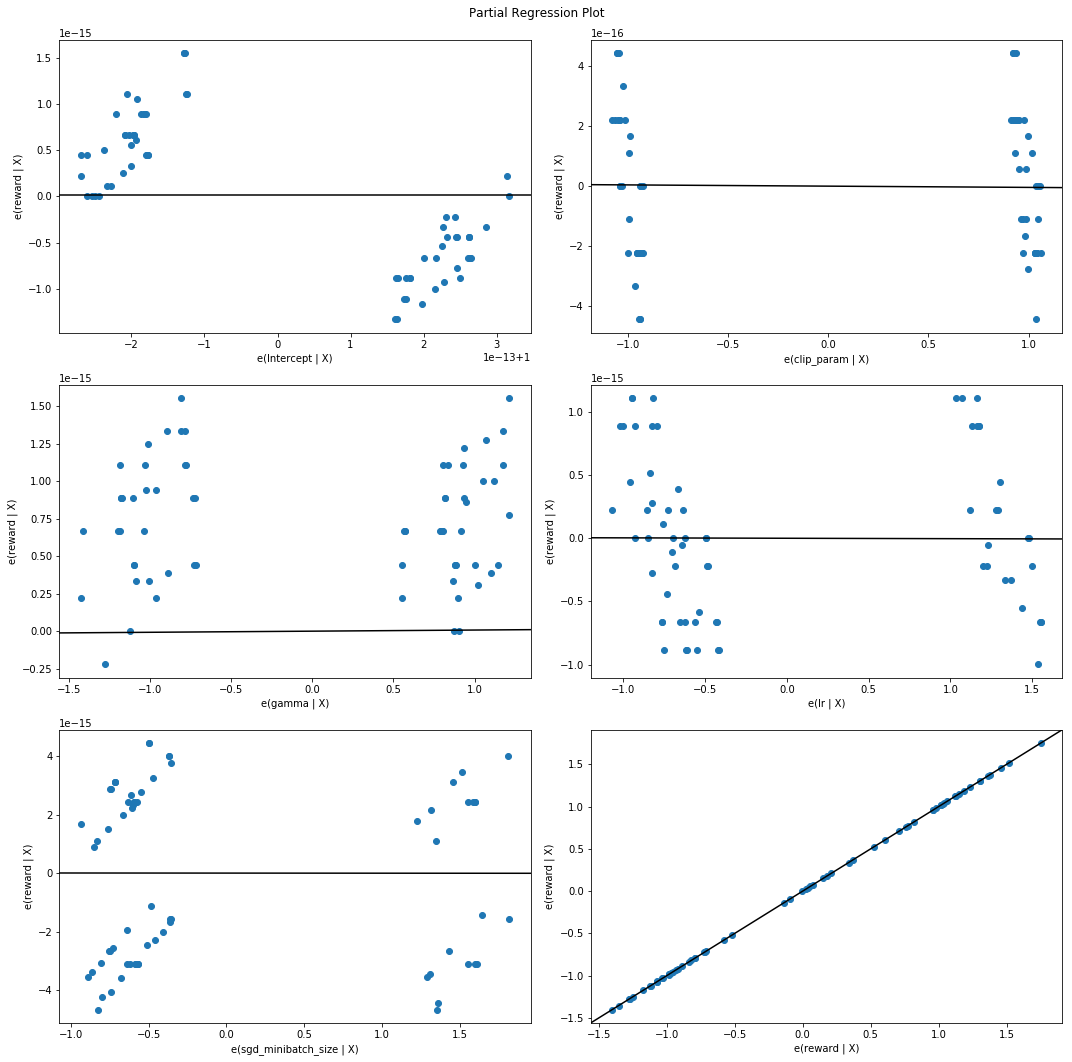

In [14]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(model, fig=fig);

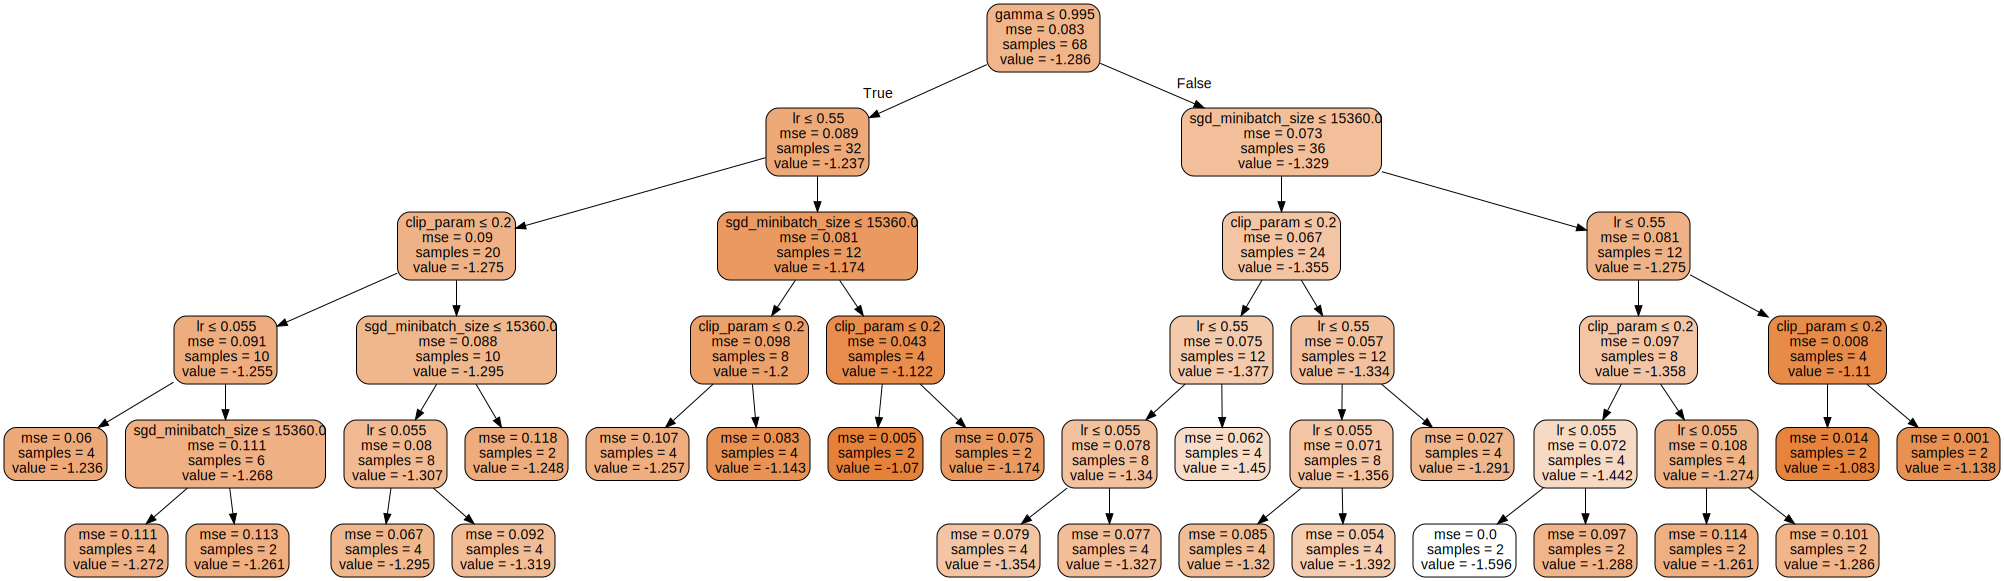

In [28]:
cols = list(data.columns.values)
cols.remove('reward')
reg = tree.DecisionTreeRegressor().fit(data[cols], data['reward'])
dot_data = tree.export_graphviz(reg, out_file=None,
                         feature_names=cols,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(dot_data)  